In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download date from University of michigan's surveys of consumers
CCI = pd.read_csv('http://www.sca.isr.umich.edu/files/tbmics.csv')
CCI.tail()

,Month,YYYY,ICS_ALL
634,March,2023,62.0
635,April,2023,63.5
636,May,2023,59.2
637,June,2023,64.4
638,July,2023,71.6


In [3]:
# Manipulate the data
CCI['YYYY'] = CCI['YYYY'].astype(str)
CCI['Date'] = CCI['Month']+'-'+CCI['YYYY']
CCI.set_index('Date',inplace=True)
CCI.index = pd.to_datetime(CCI.index)
CCI.tail()

,Month,YYYY,ICS_ALL
Date,,,
2023-03-01,March,2023,62.0
2023-04-01,April,2023,63.5
2023-05-01,May,2023,59.2
2023-06-01,June,2023,64.4
2023-07-01,July,2023,71.6


In [4]:
# Calculate YoY change in  %
CCI['%YoY'] = (CCI['ICS_ALL']/CCI['ICS_ALL'].shift(12))-1
CCI = CCI[['ICS_ALL','%YoY']]
CCI.tail()

,ICS_ALL,%YoY
Date,,
2023-03-01,62.0,0.043771
2023-04-01,63.5,-0.026074
2023-05-01,59.2,0.013699
2023-06-01,64.4,0.288000
2023-07-01,71.6,0.390291


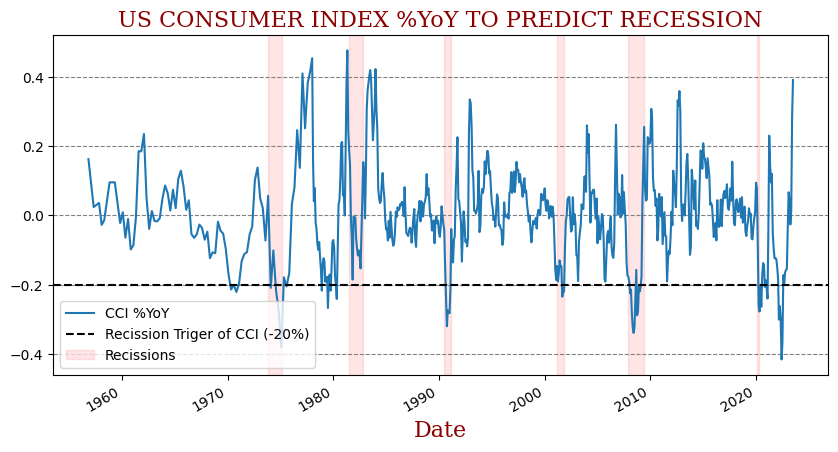

In [6]:
# Plot the Data

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('US CONSUMER INDEX %YoY TO PREDICT RECESSION',fontdict=font)
plt.xlabel('DATE',fontdict=font)

CCI["%YoY"].plot(ax=ax, label='%YoY')
# set a horizontal area which indicate the recession entry and exit
ax.axhline(-0.2, color='black', ls='--')
ax.yaxis.grid(color='gray', linestyle='dashed')

# Highlighting recessions
plt.axvspan('1973-11-01','1975-03-01', color='red', alpha=0.1)
plt.axvspan('1981-07-01','1982-11-01', color='red', alpha=0.1)
plt.axvspan('1990-07-01','1991-03-01', color='red', alpha=0.1)
plt.axvspan('2001-03-01','2001-11-01', color='red', alpha=0.1)
plt.axvspan('2007-12-01','2009-06-01', color='red', alpha=0.1)
plt.axvspan('2020-02-01','2020-04-01', color='red', alpha=0.1)

ax.legend(['CCI %YoY','Recission Triger of CCI (-20%)','Recissions'])
plt.show()